# Predicción Simple_2 (con training)

In [10]:
import numpy as np
import numpy as np
import pandas as pd
import os
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
def y2indicator(y, K):
    N = len(y)
    ind = np.zeros((N, K))
    for i in xrange(N):
        ind[i, y[i]] = 1
    return ind

In [3]:
# normalize numerical columns
# one-hot categorical columns

def get_data():
    df = pd.read_csv('ecommerce_data.csv')

    # just in case you're curious what's in it
    # df.head()

    # easier to work with numpy array
    data = df.as_matrix()

    X = data[:,:-1]
    Y = data[:,-1]

    # normalize columns 1 and 2
    X[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    X[:,2] = (X[:,2] - X[:,2].mean()) / X[:,2].std()

    # create a new matrix X2 with the correct number of columns
    N, D = X.shape
    X2 = np.zeros((N, D+3))
    X2[:,0:(D-1)] = X[:,0:(D-1)] # non-categorical

    # one-hot
    for n in xrange(N):
        t = int(X[n,D-1])
        X2[n,t+D-1] = 1

    # method 2
    # Z = np.zeros((N, 4))
    # Z[np.arange(N), X[:,D-1].astype(np.int32)] = 1
    # # assign: X2[:,-4:] = Z
    # assert(np.abs(X2[:,-4:] - Z).sum() < 1e-10)

    return X2, Y

In [4]:
# make predictions
def softmax(a):
    expA = np.exp(a)
    return expA / expA.sum(axis=1, keepdims=True)

In [5]:
def forward(X, W1, b1, W2, b2):
    Z = np.tanh(X.dot(W1) + b1)
    return softmax(Z.dot(W2) + b2), Z

In [6]:
def predict(P_Y_given_X):
    return np.argmax(P_Y_given_X, axis=1)

In [7]:
# calculate the accuracy
def classification_rate(Y, P):
    return np.mean(Y == P)

In [8]:
def cross_entropy(T, pY):
    return -np.mean(T*np.log(pY))

## main ( )

### 1. Leemos datos e inicializamos variables

In [11]:
X, Y = get_data()
X, Y = shuffle(X, Y)
Y = Y.astype(np.int32)
M = 5
D = X.shape[1]
K = len(set(Y))

In [12]:
# creamos los datasets de train y test
Xtrain = X[:-100]
Ytrain = Y[:-100]
Ytrain_ind = y2indicator(Ytrain, K)
Xtest = X[-100:]
Ytest = Y[-100:]
Ytest_ind = y2indicator(Ytest, K)

### 2. Inicializamos los pesos

In [13]:
# inicializamos los pesos en forma random
W1 = np.random.randn(D, M)
b1 = np.zeros(M)
W2 = np.random.randn(M, K)
b2 = np.zeros(K)

### 3. Entrenamos

In [14]:
# lazo de training
train_costs = []
test_costs = []
learning_rate = 0.001
for i in xrange(10000):
    pYtrain, Ztrain = forward(Xtrain, W1, b1, W2, b2)
    pYtest, Ztest = forward(Xtest, W1, b1, W2, b2)

    ctrain = cross_entropy(Ytrain_ind, pYtrain)
    ctest = cross_entropy(Ytest_ind, pYtest)
    train_costs.append(ctrain)
    test_costs.append(ctest)

    # Hacemos el gradient descent
    W2 -= learning_rate*Ztrain.T.dot(pYtrain - Ytrain_ind)
    b2 -= learning_rate*(pYtrain - Ytrain_ind).sum(axis=0)
    dZ = (pYtrain - Ytrain_ind).dot(W2.T) * (1 - Ztrain*Ztrain)
    W1 -= learning_rate*Xtrain.T.dot(dZ)
    b1 -= learning_rate*dZ.sum(axis=0)
    if i % 1000 == 0:
        print i, ctrain, ctest

0 0.459456594862 0.424902567235
1000 0.0237558070215 0.0199400501973
2000 0.0187472287948 0.0136836851387
3000 0.015962337171 0.0139193359195
4000 0.0142688893392 0.0147103019157
5000 0.0130081203765 0.0164783583432
6000 0.0120015144766 0.0182009263855
7000 0.0112042212588 0.0194986923355
8000 0.0105387807575 0.0203058002298
9000 0.00999248522012 0.0207656242576


In [17]:
print "Ratio de Clasificacion (training):", classification_rate(Ytrain, predict(pYtrain))
print "Ratio de Clasificacion (test):", classification_rate(Ytest, predict(pYtest))

Ratio de Clasificacion (training): 0.985
Ratio de Clasificacion (test): 0.99


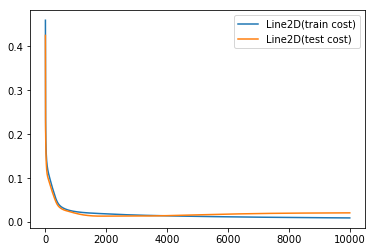

In [18]:
legend1, = plt.plot(train_costs, label='train cost')
legend2, = plt.plot(test_costs, label='test cost')
plt.legend([legend1, legend2])
plt.show()